In [1]:
#pip install pyogrio numpy geopandas shapely matplotlib geodatasets

In [2]:
import shapely
from shapely import Point
import geopandas
from geopandas import GeoSeries, GeoDataFrame
from geopandas import read_file
from geodatasets import get_path
import pyogrio
from pyogrio import read_dataframe, list_drivers, read_info, write_dataframe
from matplotlib import pyplot

In [3]:
espg = 'EPSG:26918'
c = 1000
namesArr = ['A','B','C','D','E']
radiusArr = [80, 20, 30, 40, 50]
pointsArr = [Point(c*-87.789,c*41.976), Point(c*-87.482,c*41.677), Point(c*-87.599,c*41.908), Point(c*-87.598,c*41.708), Point(c*-87.643,c*41.675)]
circlesArr = [p.buffer(r) for p, r in zip(pointsArr, radiusArr)]
pointsDf = geopandas.GeoDataFrame({'name': ['A','B','C','D','E']}, geometry=pointsArr, crs='EPSG:26918')
circlesDf = geopandas.GeoDataFrame({'name': namesArr, 'centroids': pointsArr, 'radius': radiusArr}, geometry=circlesArr, crs=espg)
circlesDf

,name,centroids,radius,geometry
0,A,POINT (-87789 41976),80,"POLYGON ((-87709 41976, -87709.385 41968.159, ..."
1,B,POINT (-87482 41677),20,"POLYGON ((-87462 41677, -87462.096 41675.04, -..."
2,C,POINT (-87599 41908),30,"POLYGON ((-87569 41908, -87569.144 41905.059, ..."
3,D,POINT (-87598 41708),40,"POLYGON ((-87558 41708, -87558.193 41704.079, ..."
4,E,POINT (-87643 41675),50,"POLYGON ((-87593 41675, -87593.241 41670.099, ..."


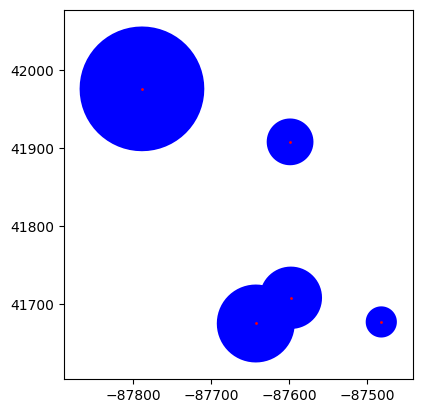

In [4]:
pyplot.close()
fig, ax = pyplot.subplots()
#fig, ax = pyplot.subplots()

#a = circlesDf.head().plot(ax=ax, markersize=1)

circlesDf.to_crs(espg).plot(ax=ax, markersize=1, color='blue')
pointsDf.plot(ax=ax, markersize=1, color='red')
pyplot.show()